# Ансамбли моделей машинного обучения. Часть 2

## Загрузка датасета

In [3]:
import pandas as pd
df = pd.read_csv('GM_players_statistics.csv')

In [4]:
df.dtypes

ID                             int64
name                          object
username                      object
profile                       object
user_id                        int64
title                         object
fide                         float64
country                       object
followers                      int64
joined                        object
last_online                   object
current_rapid_rating         float64
highest_rapid_rating         float64
highest_rapid_date            object
rapid_win                    float64
rapid_draw                   float64
rapid_loss                   float64
current_blitz_rating         float64
highest_blitz_rating         float64
highest_blitz_date            object
blitz_win                    float64
blitz_draw                   float64
blitz_loss                   float64
current_bullet_rating        float64
highest_bullet_rating        float64
highest_bullet_date           object
bullet_win                   float64
b

In [5]:
df.head()

,ID,name,username,profile,user_id,title,fide,country,followers,joined,...,highest_bullet_date,bullet_win,bullet_draw,bullet_loss,highest_tactics_rating,highest_tactics_date,highest_puzzle_rush_score,is_streamer,status,league
0,0,Komodo Engine,komodochess,https://www.chess.com/member/KomodoChess,24944922,GM,3411.0,United States,494,07/11/2015,...,NaN,NaN,NaN,NaN,400,07/11/2015,NaN,False,premium,NaN
1,1,Vojtěch Plát,vojtechplat,https://www.chess.com/member/VojtechPlat,37712368,GM,2950.0,Czech Republic,360,11/08/2017,...,27/09/2021,32.0,8.0,47.0,3251,15/09/2021,49.0,False,premium,Bronze
2,2,PlayMagnus Carlsen,playmagnus,https://www.chess.com/member/PlayMagnus,19578862,GM,2882.0,Norway,199,05/11/2014,...,NaN,NaN,NaN,NaN,400,05/11/2014,NaN,False,premium,NaN
3,3,Magnus Carlsen,magnuscarlsen,https://www.chess.com/member/MagnusCarlsen,3889224,GM,2882.0,Norway,142482,27/08/2010,...,28/03/2023,662.0,98.0,246.0,400,27/08/2010,NaN,False,premium,Elite
4,4,Fabiano Caruana,fabianocaruana,https://www.chess.com/member/FabianoCaruana,11177810,GM,2835.0,United States,14445,17/03/2013,...,30/11/2021,713.0,65.0,203.0,3519,14/06/2023,64.0,False,premium,Crystal


## Заполнение пропусков

In [7]:
from sklearn.impute import SimpleImputer

num_cols = []

for col in df.columns:
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)

    if dt=='float64' or dt=='int64':
        num_cols.append(col)
    
    if temp_null_count == 0:
        continue

    imp_strategy=''
    if dt=='float64' or dt=='int64':
        imp_strategy = 'mean'
    else:
        imp_strategy = 'most_frequent'

    imp_num = SimpleImputer(strategy=imp_strategy)
    data_num_imp = imp_num.fit_transform(df[[col]])
    df[[col]] = data_num_imp

df[num_cols]

,ID,user_id,fide,followers,current_rapid_rating,highest_rapid_rating,rapid_win,rapid_draw,rapid_loss,current_blitz_rating,...,blitz_win,blitz_draw,blitz_loss,current_bullet_rating,highest_bullet_rating,bullet_win,bullet_draw,bullet_loss,highest_tactics_rating,highest_puzzle_rush_score
0,0,24944922,3411.000000,494,2382.517536,2555.735206,35.672986,12.870142,15.783886,2696.157781,...,1460.873199,272.278098,1046.095821,2654.360614,2722.38549,946.055413,96.741688,649.266837,400,53.611062
1,1,37712368,2950.000000,360,2383.000000,2672.000000,12.000000,5.000000,6.000000,2823.000000,...,976.000000,280.000000,847.000000,2661.000000,2750.00000,32.000000,8.000000,47.000000,3251,49.000000
2,2,19578862,2882.000000,199,2382.517536,2555.735206,35.672986,12.870142,15.783886,2696.157781,...,1460.873199,272.278098,1046.095821,2654.360614,2722.38549,946.055413,96.741688,649.266837,400,53.611062
3,3,3889224,2882.000000,142482,2925.000000,2977.000000,43.000000,23.000000,8.000000,3287.000000,...,1402.000000,292.000000,334.000000,3249.000000,3390.00000,662.000000,98.000000,246.000000,400,53.611062
4,4,11177810,2835.000000,14445,2794.000000,3045.000000,122.000000,103.000000,46.000000,3125.000000,...,1012.000000,194.000000,322.000000,3030.000000,3113.00000,713.000000,65.000000,203.000000,3519,64.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,1503,13526852,2002.937568,2,2382.517536,2555.735206,35.672986,12.870142,15.783886,2375.000000,...,50.000000,9.000000,27.000000,2102.000000,2083.00000,13.000000,1.000000,7.000000,400,53.611062
1504,1504,4042329,2002.937568,127,2375.000000,2555.000000,7.000000,2.000000,6.000000,2415.000000,...,3293.000000,538.000000,2521.000000,2400.000000,2594.00000,496.000000,47.000000,402.000000,3356,44.000000
1505,1505,83663714,2002.937568,37,2382.517536,2555.735206,35.672986,12.870142,15.783886,2961.000000,...,338.000000,22.000000,96.000000,2654.360614,2722.38549,946.055413,96.741688,649.266837,400,53.611062
1506,1506,148025331,2002.937568,5,2382.517536,2555.735206,35.672986,12.870142,15.783886,2771.000000,...,138.000000,3.000000,11.000000,2654.360614,2722.38549,946.055413,96.741688,649.266837,400,53.611062


<Axes: >

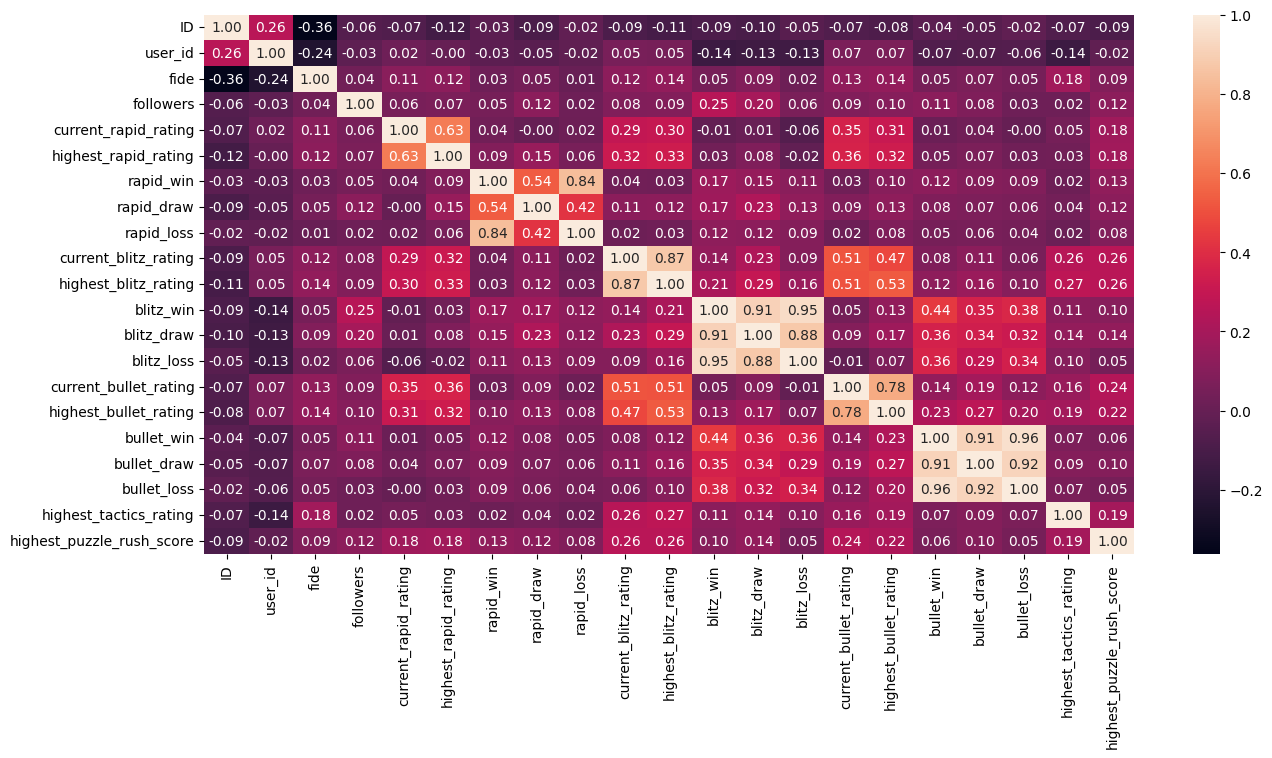

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(df[num_cols].corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

## Разбиение на обучающую и тестовую выборки

In [18]:
from sklearn.model_selection import train_test_split

x_df = df[num_cols].drop(columns='highest_rapid_rating') # числовые колонки

y_df = df['highest_rapid_rating'] # колонка с закодированной лигой

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.25, random_state=42)

## Стекинг

In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Качество отдельных моделей
def val_mae(model):
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    result = mean_absolute_error(y_test, y_predict)
    print(model)
    print('MAE={}'.format(result))

# Точность на отдельных моделях
for model in [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=50)
]:
    val_mae(model)
    print('==========================')
    print()

LinearRegression()
MAE=104.50076202958853

DecisionTreeRegressor()
MAE=114.77703135933392

RandomForestRegressor(n_estimators=50)
MAE=89.0177419792539



In [24]:
from heamy.estimator import Regressor, Classifier
from heamy.pipeline import ModelsPipeline
from heamy.dataset import Dataset

dataset = Dataset(x_train, y_train, x_test)

# модели первого уровня
model_tree = Regressor(dataset=dataset, estimator=DecisionTreeRegressor, name='tree')
model_lr = Regressor(dataset=dataset, estimator=LinearRegression, parameters={'normalize': True},name='lr')
model_rf = Regressor(dataset=dataset, estimator=RandomForestRegressor, parameters={'n_estimators': 50},name='rf')

In [26]:
# Эксперимент 1
# Первый уровень - две модели: дерево и линейная регрессия
# Второй уровень: линейная регрессия

pipeline = ModelsPipeline(model_tree, model_lr)
stack_ds = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds, estimator=LinearRegression)
results = stacker.validate(k=10,scorer=mean_absolute_error)

TypeError: LinearRegression.__init__() got an unexpected keyword argument 'normalize'

In [22]:
# Эксперимент 2
# Первый уровень - две модели: дерево и линейная регрессия
# Второй уровень: случайный лес

stacker = Regressor(dataset=stack_ds, estimator=RandomForestRegressor)
results = stacker.validate(k=10,scorer=mean_absolute_error)

NameError: name 'stack_ds' is not defined